In [1]:
import pandas as pd
import numpy as np
import datetime

In [2]:
df_cuotas = pd.read_csv('00 - df_cuotas.csv', index_col = 0, sep = ';')

In [3]:
df_cuotas.head()

,fecha_ingreso,id_credito,tipo_credito,monto_credito,cuota,saldo,numero_cuota,fecha_vencimiento,fecha_pago,importe_pagado,...,telefono,nacionalidad,edad,sexo,estado_civil,cantidad_hijos,codigo_empresa,seccion,antiguedad_empleo,rubro_comercio
0,2017-01-02,1981_2,V3,990.0,439.0,0.0,3,2017-04-10,2017-03-07,439.0,...,1,ARGENTINA,56,F,SOLTERA,0,4706,DOMESTICA,34.0,CALZADOS UNISEX
1,2017-01-02,1981_2,V3,990.0,439.0,878.0,1,2017-02-10,2017-01-06,439.0,...,1,ARGENTINA,56,F,SOLTERA,0,4706,DOMESTICA,34.0,CALZADOS UNISEX
2,2017-01-02,1981_2,V3,990.0,439.0,439.0,2,2017-03-10,2017-02-08,439.0,...,1,ARGENTINA,56,F,SOLTERA,0,4706,DOMESTICA,34.0,CALZADOS UNISEX
3,2014-10-20,888_2,V3,694.0,300.7,300.7,2,2014-12-10,2014-12-15,300.7,...,1,ARGENTINA,49,F,VIUDA,2,4665,MAESTRANZA,79.0,ROPA/INDUMENTARIA
4,2014-10-20,888_2,V3,694.0,300.7,0.0,3,2015-01-10,2015-01-10,300.7,...,1,ARGENTINA,49,F,VIUDA,2,4665,MAESTRANZA,79.0,ROPA/INDUMENTARIA


In [4]:
df_cuotas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14776 entries, 0 to 14957
Data columns (total 30 columns):
fecha_ingreso        14776 non-null object
id_credito           14776 non-null object
tipo_credito         14776 non-null object
monto_credito        14776 non-null float64
cuota                14776 non-null float64
saldo                14776 non-null float64
numero_cuota         14776 non-null int64
fecha_vencimiento    14776 non-null object
fecha_pago           13565 non-null object
importe_pagado       13565 non-null float64
gastos               13565 non-null float64
saldo.1              13565 non-null float64
cuota.1              1211 non-null float64
sucursal             14776 non-null int64
codigo_comercio      13565 non-null float64
codigo_cliente       14776 non-null int64
codigo_direccion     14776 non-null int64
localidad            14776 non-null int64
codigo_postal        13983 non-null float64
tipo_propiedad       14776 non-null object
telefono             14776 n

#### Hacemos una inspección y limpieza de ciertas variables del dataset

In [5]:
# eliminamos la 'V' y la 'v' en la variable 'tipo de crédito' y transformamos en entero
df_cuotas['tipo_credito'] = df_cuotas['tipo_credito'].map(lambda x: x.replace('V', ''))
df_cuotas['tipo_credito'] = df_cuotas['tipo_credito'].map(lambda x: x.replace('v', ''))
df_cuotas['tipo_credito'] = df_cuotas['tipo_credito'].map(lambda x: int(x))

In [6]:
# renombramos la columna ya que corresponde a la cantidad de cuotas que tiene el crédito
df_cuotas.rename(columns = {'tipo_credito':'cantidad_cuotas'}, inplace = True)

In [7]:
df_cuotas.columns

Index(['fecha_ingreso', 'id_credito', 'cantidad_cuotas', 'monto_credito',
       'cuota', 'saldo', 'numero_cuota', 'fecha_vencimiento', 'fecha_pago',
       'importe_pagado', 'gastos', 'saldo.1', 'cuota.1', 'sucursal',
       'codigo_comercio', 'codigo_cliente', 'codigo_direccion', 'localidad',
       'codigo_postal', 'tipo_propiedad', 'telefono', 'nacionalidad', 'edad',
       'sexo', 'estado_civil', 'cantidad_hijos', 'codigo_empresa', 'seccion',
       'antiguedad_empleo', 'rubro_comercio'],
      dtype='object')

In [8]:
# Rellenamos valores nulos
df_cuotas.fillna({
                 'importe_pagado':0, 'fecha_pago': '2018-11-15', 'gastos': 0,
                 'codigo_comercio': -1, 'codigo_postal':-1, 
                 'estado_civil': 'no_disponible', 'seccion': 'no_disponible',
                 'antiguedad_empleo': -1, 'rubro_comercio': 'no_disponible'
                 }, inplace = True)
# verificar luego si alguno de estos criterios generan distorsión al correr el modelo

In [9]:
df_cuotas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14776 entries, 0 to 14957
Data columns (total 30 columns):
fecha_ingreso        14776 non-null object
id_credito           14776 non-null object
cantidad_cuotas      14776 non-null int64
monto_credito        14776 non-null float64
cuota                14776 non-null float64
saldo                14776 non-null float64
numero_cuota         14776 non-null int64
fecha_vencimiento    14776 non-null object
fecha_pago           14776 non-null object
importe_pagado       14776 non-null float64
gastos               14776 non-null float64
saldo.1              13565 non-null float64
cuota.1              1211 non-null float64
sucursal             14776 non-null int64
codigo_comercio      14776 non-null float64
codigo_cliente       14776 non-null int64
codigo_direccion     14776 non-null int64
localidad            14776 non-null int64
codigo_postal        14776 non-null float64
tipo_propiedad       14776 non-null object
telefono             14776 no

In [10]:
# Pasamos la variable nacionalidad a string para que no de error el "lower" de abajo
df_cuotas['nacionalidad'] = df_cuotas['nacionalidad'].map(lambda x: str(x))

# Creamos un "for loop" para pasar a minúsculas todas las variables con texto
L = ['nacionalidad', 'sexo', 'estado_civil', 'seccion', 'rubro_comercio']
for i in L:
    df_cuotas[i] = df_cuotas[i].map(lambda x: x.lower())

In [11]:
df_cuotas.iloc[:,20:30].head()

,telefono,nacionalidad,edad,sexo,estado_civil,cantidad_hijos,codigo_empresa,seccion,antiguedad_empleo,rubro_comercio
0,1,argentina,56,f,soltera,0,4706,domestica,34.0,calzados unisex
1,1,argentina,56,f,soltera,0,4706,domestica,34.0,calzados unisex
2,1,argentina,56,f,soltera,0,4706,domestica,34.0,calzados unisex
3,1,argentina,49,f,viuda,2,4665,maestranza,79.0,ropa/indumentaria
4,1,argentina,49,f,viuda,2,4665,maestranza,79.0,ropa/indumentaria


In [12]:
# se detectaron cuotas donde se cargó el estado civil en lugar de la nacionalidad

In [13]:
# generamos una máscara para identificar dichos registros
mask_nac_soltero = df_cuotas['nacionalidad'] == 'soltero'
mask_nac_soltero.sum()

18

In [14]:
df_cuotas.loc[mask_nac_soltero,'nacionalidad':'rubro_comercio']

,nacionalidad,edad,sexo,estado_civil,cantidad_hijos,codigo_empresa,seccion,antiguedad_empleo,rubro_comercio
783,soltero,28,m,argentino,0,195,administr,121.0,no_disponible
784,soltero,28,m,argentino,0,195,administr,121.0,no_disponible
785,soltero,28,m,argentino,0,195,administr,121.0,no_disponible
786,soltero,28,m,argentino,0,195,administr,121.0,no_disponible
787,soltero,28,m,argentino,0,195,administr,121.0,no_disponible
788,soltero,28,m,argentino,0,195,administr,121.0,no_disponible
789,soltero,28,m,argentino,0,195,administr,121.0,no_disponible
790,soltero,28,m,argentino,0,195,administr,121.0,no_disponible
791,soltero,28,m,argentino,0,195,administr,121.0,no_disponible
792,soltero,28,m,argentino,0,195,administr,121.0,no_disponible


In [15]:
# reemplazamos los valores correspondientes
df_cuotas.loc[mask_nac_soltero,'estado_civil'] = 'soltero'
df_cuotas.loc[mask_nac_soltero,'nacionalidad'] = 'argentino'

In [16]:
df_cuotas.loc[mask_nac_soltero,'nacionalidad':'rubro_comercio']

,nacionalidad,edad,sexo,estado_civil,cantidad_hijos,codigo_empresa,seccion,antiguedad_empleo,rubro_comercio
783,argentino,28,m,soltero,0,195,administr,121.0,no_disponible
784,argentino,28,m,soltero,0,195,administr,121.0,no_disponible
785,argentino,28,m,soltero,0,195,administr,121.0,no_disponible
786,argentino,28,m,soltero,0,195,administr,121.0,no_disponible
787,argentino,28,m,soltero,0,195,administr,121.0,no_disponible
788,argentino,28,m,soltero,0,195,administr,121.0,no_disponible
789,argentino,28,m,soltero,0,195,administr,121.0,no_disponible
790,argentino,28,m,soltero,0,195,administr,121.0,no_disponible
791,argentino,28,m,soltero,0,195,administr,121.0,no_disponible
792,argentino,28,m,soltero,0,195,administr,121.0,no_disponible


#### A continuación depuramos los valores de las distintas variables de texto

In [17]:
# Observamos la distribución de valores de la variable "sexo"
df_cuotas['sexo'].value_counts()

f    9269
m    5284
      223
Name: sexo, dtype: int64

In [18]:
# identificamos con una máscara, los registros que no tienen valor cargado para "sexo"
mask_sexo_nd = (df_cuotas['sexo'] == ' ')
mask_sexo_nd.sum()

223

In [19]:
# les asignamos el valor "no_disponible"
df_cuotas.loc[mask_sexo_nd, 'sexo'] = 'no_disponible'

In [20]:
# identificamos los registros que tienen cargado nacionalidad o estado civil femenina
mask_sexo_f = ((df_cuotas['nacionalidad'].map(lambda x: x[-1]) == 'a')| \
               (df_cuotas['estado_civil'].map(lambda x: x[-1]) == 'a'))  \
               & mask_sexo_nd
mask_sexo_f.sum()

97

In [21]:
# les asignamos el valor "f"
df_cuotas.loc[mask_sexo_f, 'sexo'] = 'f'

In [22]:
# identificamos los registros que tienen cargado nacionalidad o estado civil masculina
mask_sexo_m =  mask_sexo_nd & \
  ((df_cuotas['nacionalidad'].map(lambda x: x[-1]) == 'o') |  
   (df_cuotas['estado_civil'].map(lambda x: x[-1]) == 'o'))
mask_sexo_m.sum()

9

In [23]:
# les asignamos el valor "m"
df_cuotas.loc[mask_sexo_m, 'sexo'] = 'm'

In [24]:
# Observamos como queda la distribución de valores luego de la depuración
df_cuotas['sexo'].value_counts()

f                9357
m                5293
no_disponible     126
Name: sexo, dtype: int64

In [25]:
# Observamos la distribución inicial de los valores de la variable 'nacionalidad' 
df_cuotas['nacionalidad'].value_counts()

argentina      6468
argentina      4452
argentino      2509
arg             297
paraguaya       152
argetino        133
aargentina      117
aregentina       63
italiana         62
nan              61
boliviana        60
argenitna        58
paraguay         56
peruana          54
argetina         43
paraguaya        29
argentino        27
argentinas       20
bolivia          17
uruguay          16
paraguayo        15
peruana          14
aregentina       13
 argentina       11
uruguaya         10
argrntina         6
peru              6
brasilero         5
argemtoma         2
Name: nacionalidad, dtype: int64

In [26]:
# Definimos un diccionario de sinónimos para reemplazar los valores
dicc_sinonimos = {
    'argentina ': 'argentina',
    'argentino': 'argentina',
    'aargentina': 'argentina',
    'arg': 'argentina',
    'argetino': 'argentina',
    'aargentina': 'argentina',
    'aregentina': 'argentina',
    'nan': 'no_disponible',
    'argenitna': 'argentina',
    'paraguay': 'paraguaya', 
    'argentino ': 'argentina',
    'argentinas' : 'argentina',
    'bolivia ': 'boliviana',
    'uruguay': 'uruguaya',
    ' argentina ': 'argentina',
    'peru': 'peruana',
    'argrntina': 'argentina',
    'brasilero': 'brasileña',
    'argemtoma': 'argentina',
    'argetina': 'argentina',
    'peruana ': 'peruana',
    'paraguayo': 'paraguaya',
    'paraguaya ': 'paraguaya',
    'aregentina ': 'argentina'
                 }

In [27]:
# Reemplazamos los valores utilizando el diccionario
df_cuotas['nacionalidad'] = df_cuotas['nacionalidad'].replace(dicc_sinonimos)

In [28]:
# Observamos la distribución de valores luego de depurar con el diccionario 
df_cuotas['nacionalidad'].value_counts()

argentina        14219
paraguaya          252
boliviana           77
peruana             74
italiana            62
no_disponible       61
uruguaya            26
brasileña            5
Name: nacionalidad, dtype: int64

In [29]:
# Observamos la distribución inicial de los valores de la variable 'estado_civil' 
df_cuotas['estado_civil'].value_counts()

casado           2377
soltera          2317
casada           1936
soltera          1230
soltero          1160
viuda             822
casada            821
casado            760
concubina         397
soltero           395
no_disponible     337
concubina         302
viuda             279
concubino         271
separada          240
separada          166
divorciada        158
divorciada        137
concubino         133
casda              88
concub.            58
separado           56
concuvina          50
vuida              41
concuvino          39
div                32
divorciado         27
casdo              25
viudo              22
s                  21
casasa             18
solteo             18
concuvina          17
vid                 9
siktera             6
casdo               4
sotera              3
voida               2
concuvino           2
Name: estado_civil, dtype: int64

In [30]:
# Definimos un diccionario de sinónimos para reemplazar los valores 
dicc_sinonimos = {
    'casado': 'casado_a',
    'soltera': 'soltero_a',
    'casada': 'casado_a',
    'soltera ': 'soltero_a',
    'soltero': 'soltero_a',
    'casada ': 'casado_a',
    'viuda': 'viudo_a',
    'casado ': 'casado_a',
    'concubina': 'concubino_a',
    'soltero ': 'soltero_a', 
    'concubino': 'concubino_a',
    'separada' : 'separado_a',
    'separada ': 'separado_a',
    'divorciada': 'divorciado_a',
    'divorciada ': 'divorciado_a',
    'casado ': 'casado_a',
    'viudo': 'viudo_a',
    's': 'no_disponible',
    'casasa': 'casado_a',
    'argentino': 'no_disponible',
    'solteo': 'soltero_a',
    'concuvino': 'concubino_a',
    'concuvina': 'concubino_a',
    'concuvina ': 'concubino_a',
    'vid': 'divorciado_a',
    'siktera': 'soltero_a',
    'casdo': 'casado_a',
    'voida': 'viudo_a',
    'concuvino ': 'concubino_a',
    'concubina ': 'concubino_a',
    'casda': 'casado_a',
    'concub.': 'concubino_a',
    'separado ': 'separado_a',
    'vuida ': 'viudo_a',
    'div': 'divorciado_a',
    'divorciado': 'divorciado_a',
    'viuda ': 'viudo_a',
    'concubino ': 'concubino_a',
    'sotera': 'soltero_a',
    'casdo ': 'casado_a'
                 }

In [31]:
# Reemplazamos valores utilizando el diccionario 
df_cuotas['estado_civil'] = df_cuotas['estado_civil'].replace(dicc_sinonimos)

In [32]:
# Observamos como queda la variable luego de depurar valores
df_cuotas['estado_civil'].value_counts()

casado_a         6029
soltero_a        5129
concubino_a      1269
viudo_a          1166
separado_a        462
divorciado_a      363
no_disponible     358
Name: estado_civil, dtype: int64

In [33]:
df_cuotas['seccion'].value_counts()

no_disponible      5387
operario            888
vigilador           472
domestica           461
auxiliar            410
maestranza          380
operario            335
vigilador           287
limpieza            280
domestica           261
empleado            175
ad                  171
maestra             160
mantenimiento       146
ventas              142
planta              140
mucama              138
produccion          127
logistica           122
oficial             116
maestranza          109
ayudante            108
adm                 106
operaria            100
mucama               95
preceptora           90
op. fulonero         89
docente              89
administrativa       86
dom                  84
                   ... 
torneria             11
conduccion           11
cosecha               9
cirugia               9
mostrador             9
ensamble              9
matricero             8
soldadura             8
domes                 8
atc.cliente           7
jubilada        

In [34]:
dicc_sinonimos = {
    'operario': 'operario_a',
    'operario ': 'operario_a',
    'operaria': 'operario_a',
    'op.especilizado': 'operario_a',
    'op. fulonero': 'operario_a',
    'op.de playa': 'operario_a',
    'oper. jr': 'operario_a',
    'oper': 'operario_a',
    'maquinista ': 'operario_a',
    'jefe opera': 'operario_a',
    'planta ': 'operario_a',
    'plantea ': 'operario_a',
    'torneria': 'operario_a',
    'produccion': 'operario_a',
    'soldadura': 'operario_a',
    'soldadura ': 'operario_a',
    'armado': 'operario_a',
    'operaria ': 'operario_a',
    'maq': 'operario_a',
    'maquinista': 'operario_a',
    'ayudante': 'operario_a',
    'peon': 'operario_a',
    'peon ': 'operario_a',
    'ensamble': 'operario_a',
    'amasador': 'operario_a',
    'matricero': 'operario_a',
    'banderillero': 'operario_a',
    'logistica ': 'logistica',
    'deposito': 'logistica',   
    'vigilador ': 'seguridad',
    'vigilador': 'seguridad',
    'sereno': 'seguridad',
    'vig.gral': 'seguridad',
    'vigilancia': 'seguridad',
    'vigilancia ': 'seguridad',
    'seguridad': 'seguridad',
    'domestica': 'domestico_a',
    'domestica ': 'domestico_a',
    'empl.domestica': 'domestico_a',
    'mucama': 'domestico_a',
    'domes': 'domestico_a',
    'dom': 'domestico_a',
    'mucama ': 'domestico_a',
    'domestico': 'domestico_a',
    'casero': 'domestico_a',
    'casera': 'domestico_a',
    'caceros ': 'domestico_a',
    'ad': 'administrativo_a',
    'adm': 'administrativo_a',
    'administrativa': 'administrativo_a',
    'administr': 'administrativo_a',
    'administra': 'administrativo_a',
    'admin': 'administrativo_a',
    'administ.': 'administrativo_a',
    'administrativa ': 'administrativo_a',
    'adm.': 'administrativo_a',
    'administ. ': 'administrativo_a',
    'auxiliar ': 'administrativo_a',
    'auxiliar': 'administrativo_a',
    'maestranza ': 'maestranza',
    'limpieza ': 'maestranza',
    'limpieza': 'maestranza',
    't. generales ': 'maestranza',
    'mantenimiento ': 'maestranza',
    'mantenimiento': 'maestranza',
    'mantenim': 'maestranza',
    'mant': 'maestranza',
    'portero': 'maestranza',
    'vend': 'ventas',
    'venta': 'ventas',
    'ventas ': 'ventas',
    'vendedora': 'ventas',
    'vendedor': 'ventas',
    'mostrador ': 'ventas',
    'caja ': 'ventas',
    'atc.cliente': 'ventas',
    'tesoreria': 'ventas',
    'boleteria': 'ventas',
    'maestro': 'docente',
    'docente': 'docente',
    'maestra': 'docente',
    'profesora': 'docente',
    'docente ': 'docente',
    'preceptora ': 'docente',
    'profesor ': 'docente',
    'profesor': 'docente',
    'profesora ': 'docente',
    'm. inicial': 'docente',
    'secretaria ': 'secretaria',
    'asist. personal': 'secretaria',
    'asistente ': 'secretaria',
    'asistente': 'secretaria',
    'conductor ': 'chofer',
    'choffer': 'chofer',
    'conductor  ': 'chofer',    
    'conduccion': 'chofer',
    'p. de cocina': 'gastronomia',
    'ay cocina': 'gastronomia',
    'gastronomia ': 'gastronomia',
    'gastronomia': 'gastronomia',
    'mozo ': 'gastronomia',
    'mozo': 'gastronomia',
    'cocina': 'gastronomia',
    'enfermera': 'emp. salud',
    'lab.control': 'emp. salud',
    'terapia int': 'emp. salud',
    'radiologa ': 'emp. salud',
    'enfermeria ': 'emp. salud',
    'cirugia': 'emp. salud',
    'neumolog': 'emp. salud',
    'pintura ': 'oficio',
    'peluqueria': 'oficio',
    'jardinero': 'oficio',
    'jardinero ': 'oficio',
    'mecanico': 'oficio',
    'manicura ': 'oficio',
    'albaÃ±il': 'oficio',
    'albañil': 'oficio',
    'carniceria ': 'oficio',
    'peluqueria': 'oficio',
    'jubilado': 'jubilado',
    'jubilada': 'jubilado',
    'clasificacion p': 'no_disponible',
    'prov': 'no_disponible',
    '1076': 'no_disponible',
    'mg': 'no_disponible',
                 }

In [35]:
df_cuotas['seccion'] = df_cuotas['seccion'].replace(dicc_sinonimos)

In [36]:
df_cuotas['seccion'].value_counts()

no_disponible       5468
operario_a          2252
domestico_a         1221
maestranza          1064
administrativo_a     964
seguridad            889
docente              571
ventas               399
oficio               215
gastronomia          196
emp. salud           191
empleado             175
logistica            170
chofer               163
secretaria           162
oficial              116
clarkista             83
caballeriza           55
inspector             48
polipliego            44
tennis                43
conductor             39
empleada              32
supervisor            29
defensa civil         24
pomos                 24
creditos              22
peluqueria            21
control               17
inspeccion de c       14
marinero              13
alumbrado             12
playa                 12
cosecha                9
jubilado               9
impresin               5
agente                 5
Name: seccion, dtype: int64

In [37]:
df_cuotas['rubro_comercio'].value_counts()

no_disponible               9092
supermercado                1903
calzados unisex             1259
indumentaria unisex          540
calzados                     215
ropa de hombre               185
ropa/indumentaria            162
pañalera y ropa de bebes     152
ropa de bebe                 151
ropa informal unisex         146
regaleria                    126
pañalera                      91
lenceria                      77
ropa de dama                  66
jugueteria                    54
telefonia celular             53
corralon                      48
aberturas                     47
mat de construccion           43
optica                        40
ropa informal                 39
disqueria                     33
muebles de pino               25
pinturerias                   17
uniformes escolares           16
computacion                   16
uniformes                     16
blanqueria                    16
cerro                         15
ceramica maschwitz            14
optica y c

In [38]:
dicc_rubro = {
    'calzados unisex': 'calzado',
    'indumentaria unisex': 'indumentaria',
    'calzados': 'calzado',
    'ropa de hombre': 'indumentaria',
    'ropa/indumentaria': 'indumentaria',
    'pañalera y ropa de bebes': 'bebe',
    'ropa de bebe': 'bebe',
    'ropa informal unisex': 'indumentaria',
    'pañalera': 'bebe',
    'lenceria': 'otro comercio',
    'ropa de dama': 'indumentaria',
    'jugueteria': 'otro comercio',
    'telefonia celular': 'otro comercio',
    'corralon': 'construccion',
    'aberturas': 'construccion',
    'mat de construccion': 'construccion',
    'optica': 'otro comercio',
    'ropa informal': 'indumentaria',
    'disqueria': 'otro comercio',
    'muebles de pino': 'muebleria',
    'pinturerias': 'construccion',
    'uniformes escolares': 'indumentaria',
    'blanqueria': 'otro comercio',
    'computacion': 'otro comercio',
    'uniformes': 'indumentaria',
    'cerro': 'no_disponible',
    'ceramica maschwitz': 'construccion',
    'muebleria': 'otro comercio',
    'optica y contactologia': 'otro comercio',
    'blanqueria': 'otro comercio',
    'mat. construccion': 'construccion',
    'jugeteria /libreria': 'otro comercio',
    'calzados': 'calzado',
    'video juegos': 'otro comercio',
    'baterias': 'otro comercio',
    'deportes': 'otro comercio',
    'pañalera /art bebes': 'bebe',
    'indumentaria': 'indumentaria',
    'ferreteria': 'construccion',
    'colchoneria': 'otro comercio',
    'ropa de hombres': 'indumentaria',
    'electro/muebleria': 'otro comercio',
    '1': 'no_disponible',
    'abertura y  vidrieria': 'construccion',
    'ropa indumentaria': 'indumentaria',
        }

In [39]:
df_cuotas['rubro_comercio'] = df_cuotas['rubro_comercio'].replace(dicc_rubro)

In [40]:
df_cuotas['rubro_comercio'].value_counts()

no_disponible    9109
supermercado     1903
calzado          1474
indumentaria     1179
bebe              399
otro comercio     380
construccion      185
regaleria         126
blanqueria         13
calzados            8
Name: rubro_comercio, dtype: int64

#### Generamos mascaras booleanas para agregar valores y evaluar el dataset; generamos ciertas variables numéricas e indicadoras

In [41]:
current_day = '2018-11-15'
print(current_day)

2018-11-15


In [42]:
# Asignamos un saldo de cuota (al día del dataset) calculado
df_cuotas['saldo_cuota_hoy'] = df_cuotas.loc[:, 'cuota'] - \
                                                  df_cuotas.loc[:, 'importe_pagado']

In [43]:
# Generamos una mascara con las cuotas pendientes de pago (incluye vencidas y no vencidas)
mask_pendiente_pago = df_cuotas.loc[:,'saldo_cuota_hoy'] > 0
mask_pendiente_pago.sum()

3001

In [44]:
# Generamos una máscara booleana de cuotas no vencidas
mask_no_vencida =  df_cuotas.loc[:,'fecha_vencimiento'] >= current_day
mask_no_vencida.sum()

483

In [45]:
# Asignamos indicador de cuota no vencida
df_cuotas['cuota_no_vencida_hoy'] = 0
df_cuotas.loc[mask_no_vencida, 'cuota_no_vencida_hoy'] = 1

In [46]:
# Generamos una máscara booleana con las cuotas en mora que son aquellas que al día
# del dataset están pendientes de pago y vencidas 
mask_mora = mask_pendiente_pago & ~mask_no_vencida
mask_mora.sum()

2526

In [47]:
# Asignamos indicador de cuota en mora (esta variable será el vector objetivo)
df_cuotas['mora_hoy'] = 0
df_cuotas.loc[mask_mora, 'mora_hoy'] = 1

In [48]:
(mask_mora & mask_no_vencida).sum()

0

In [49]:
# Verificamos que no hayan cuotas en mora dentro de las no vencidas
df_cuotas.loc[mask_no_vencida, 'mora_hoy'].sum()

0

In [50]:
# Pasamos a números enteros las columnas que quedaron como flotantes sin serlo
lista_transformar = ['codigo_comercio', 'codigo_postal', 'antiguedad_empleo']

for i in lista_transformar:
    df_cuotas[i] = df_cuotas.loc[:,i].map(lambda x: int(x), na_action = 'ignore')

In [51]:
df_cuotas.iloc[:,10:20].head(10)

,gastos,saldo.1,cuota.1,sucursal,codigo_comercio,codigo_cliente,codigo_direccion,localidad,codigo_postal,tipo_propiedad
0,0.00,0.0,NaN,1,8,0,0,1,1625,alquilada
1,0.00,0.0,NaN,1,8,0,0,1,1625,alquilada
2,0.00,0.0,NaN,1,8,0,0,1,1625,alquilada
3,7.52,0.0,NaN,1,17,1,1,1,1625,alquilada
4,0.00,0.0,NaN,1,17,1,1,1,1625,alquilada
5,0.00,0.0,NaN,1,17,1,1,1,1625,alquilada
6,43.42,0.0,NaN,1,27,2,2,3,1625,alquilada
7,49.15,0.0,NaN,1,8,2,2,3,1625,alquilada
8,5.11,0.0,NaN,1,27,2,2,3,1625,alquilada
9,5.78,0.0,NaN,1,8,2,2,3,1625,alquilada


In [52]:
df_cuotas.columns

Index(['fecha_ingreso', 'id_credito', 'cantidad_cuotas', 'monto_credito',
       'cuota', 'saldo', 'numero_cuota', 'fecha_vencimiento', 'fecha_pago',
       'importe_pagado', 'gastos', 'saldo.1', 'cuota.1', 'sucursal',
       'codigo_comercio', 'codigo_cliente', 'codigo_direccion', 'localidad',
       'codigo_postal', 'tipo_propiedad', 'telefono', 'nacionalidad', 'edad',
       'sexo', 'estado_civil', 'cantidad_hijos', 'codigo_empresa', 'seccion',
       'antiguedad_empleo', 'rubro_comercio', 'saldo_cuota_hoy',
       'cuota_no_vencida_hoy', 'mora_hoy'],
      dtype='object')

#### Generamos Variables Nuevas con "Fecha Valor"

In [53]:
# Ordenamos el DataFrame     
df_cuotas.sort_values(by = ['codigo_cliente', 'fecha_ingreso', 'id_credito', 'numero_cuota'], inplace = True)

In [54]:
# Reseteamos el índice del DataFrame ordenado sin perder el índice viejo (drop=False)
df_cuotas = df_cuotas.reset_index(drop=False)

Añadimos una Columna que cuenta la cantidad de Créditos por cliente

In [55]:
# Contamos la cantidad de créditos por cliente ordenados por fecha de otrogamiento
# y lo registramos el la columna 'numero_credito_cliente'

# debugging = 1 imprime los valores del "for loop" para ver la evolución de las variables

debugging = 0
cliente_anterior = 0
credito_anterior = 0
cont_credito = 0
df_cuotas['num_cred_cli'] = 0

for cuota in np.arange(0,len(df_cuotas)):
    cliente = df_cuotas.loc[cuota, 'codigo_cliente']
    credito = df_cuotas.loc[cuota, 'id_credito']
    if cliente != cliente_anterior:
        cont_credito = 1
    else:
        if credito != credito_anterior: cont_credito += 1
   
    df_cuotas.loc[cuota,'num_cred_cli'] = cont_credito
    
    if debugging == 1:
        print('cliente = {}\tcredito = {}\tcliente_anterior = {}\tcont_credito = {}'.\
                               format(cliente, credito, cliente_anterior, cont_credito))
    
    cliente_anterior = cliente
    credito_anterior = credito

In [56]:
df_cuotas.columns

Index(['index', 'fecha_ingreso', 'id_credito', 'cantidad_cuotas',
       'monto_credito', 'cuota', 'saldo', 'numero_cuota', 'fecha_vencimiento',
       'fecha_pago', 'importe_pagado', 'gastos', 'saldo.1', 'cuota.1',
       'sucursal', 'codigo_comercio', 'codigo_cliente', 'codigo_direccion',
       'localidad', 'codigo_postal', 'tipo_propiedad', 'telefono',
       'nacionalidad', 'edad', 'sexo', 'estado_civil', 'cantidad_hijos',
       'codigo_empresa', 'seccion', 'antiguedad_empleo', 'rubro_comercio',
       'saldo_cuota_hoy', 'cuota_no_vencida_hoy', 'mora_hoy', 'num_cred_cli'],
      dtype='object')

#### Creamos un DaraFrame de Creditos

El evento que nos interesa a los fines de determinar si otorgar o no un crédito es el crédito y no la cuota. Por este motivo, en el DataFrame de Créditos, agregamos los valores de cada una de las cuotas que lo componene en un solo registro

In [57]:
# Definimos un diccionario que nos permitirá seleccionar una función de agregación para
# cada columna seleccionada en el pivot_table
dict_aggr = {
    'fecha_ingreso': min, 'cantidad_cuotas': min,
    'monto_credito': min, 'cuota': min,
    'fecha_vencimiento': max, 'fecha_pago': max, 'importe_pagado': sum, 'gastos': sum, 
    'sucursal': min, 'codigo_comercio': min,
    'codigo_cliente': lambda x: x.mode(), 'codigo_direccion': min, 'localidad': min,
    'codigo_postal': min, 'tipo_propiedad': lambda x: x.mode(), 'telefono': min,
    'nacionalidad': lambda x: x.mode(), 'edad': min,
    'sexo': lambda x: x.mode(), 'estado_civil': lambda x: x.mode(), 
    'cantidad_hijos': min, 'codigo_empresa': min , 'seccion': lambda x: x.mode(),
    'antiguedad_empleo': min, 'rubro_comercio': lambda x: x.mode(), 
    'saldo_cuota_hoy': sum, 'cuota_no_vencida_hoy': max, 'mora_hoy': max,
    'num_cred_cli': min
            }
    

In [58]:
# Definimos un DataFrame "df_creditos" que agrega las cuotas de cada crédito
df_creditos = pd.pivot_table(df_cuotas, index = 'id_credito', aggfunc = dict_aggr,
    values = ['fecha_ingreso', 'cantidad_cuotas', 'monto_credito','cuota',
    'fecha_vencimiento', 'fecha_pago', 'importe_pagado', 'gastos', 
    'sucursal','codigo_comercio', 'codigo_cliente', 'codigo_direccion', 'localidad',
    'codigo_postal', 'tipo_propiedad', 'telefono', 'nacionalidad', 'edad',
    'sexo', 'estado_civil', 'cantidad_hijos', 'codigo_empresa', 'seccion',
    'antiguedad_empleo', 'rubro_comercio', 'saldo_cuota_hoy',
    'cuota_no_vencida_hoy', 'mora_hoy', 'num_cred_cli'
                 ])

In [59]:
# Seleccionamos las columnas de interés y las ponemos en órden para interpretar mejor
df_creditos = df_creditos[['fecha_ingreso', 'cantidad_cuotas', 'monto_credito','cuota',
    'importe_pagado', 'gastos', 'fecha_vencimiento', 'fecha_pago', 
    'sucursal','codigo_comercio', 'codigo_cliente', 'codigo_direccion', 'localidad',
    'codigo_postal', 'tipo_propiedad', 'telefono', 'nacionalidad', 'edad',
    'sexo', 'estado_civil', 'cantidad_hijos', 'codigo_empresa', 'seccion',
    'antiguedad_empleo', 'rubro_comercio',  'saldo_cuota_hoy',
    'cuota_no_vencida_hoy', 'mora_hoy', 'num_cred_cli', 
                          ]]

In [60]:
# Renombramos las columnas para reflejar el criterio de agregación
df_creditos.rename(columns = { 'importe_pagado': 'total_pagado',
    'gastos': 'total_gastos', 'fecha_vencimiento':'fecha_vencimiento_ultima_cuota',
    'fecha_pago': 'fecha_ultimo_pago', 'saldo_cuota_hoy': 'saldo_credito_hoy', 
    'cuota_no_vencida_hoy':'credito_no_vencido_hoy'
                             }, inplace = True)

In [61]:
df_creditos.iloc[:,0:10].head(15)

,fecha_ingreso,cantidad_cuotas,monto_credito,cuota,total_pagado,total_gastos,fecha_vencimiento_ultima_cuota,fecha_ultimo_pago,sucursal,codigo_comercio
id_credito,,,,,,,,,,
1000_1,2016-03-14,2,1473.0,862.0,1724.0,0.00,2016-05-10,2016-05-09,1,8
1000_2,2014-12-19,8,16033.5,2840.0,22720.0,0.00,2015-08-10,2016-01-11,1,1
1001_1,2016-03-14,6,1898.0,459.0,2754.0,103.58,2016-09-10,2016-09-12,1,8
1001_2,2014-12-22,3,1098.0,475.8,1427.4,2.38,2015-03-10,2015-03-11,1,771
1002_1,2016-03-14,6,1340.0,324.0,1944.0,124.74,2016-11-10,2016-11-09,1,8
1002_2,2014-12-22,2,149.0,89.4,178.8,0.00,2015-03-10,2015-03-06,1,771
1003_1,2016-03-14,2,820.0,480.0,960.0,12.00,2016-05-10,2016-05-09,1,8
1003_2,2014-12-22,2,440.0,257.4,514.8,0.00,2015-02-10,2015-02-02,1,8
1004_1,2016-03-14,2,540.0,316.0,632.0,0.00,2016-05-10,2016-05-09,1,8


In [62]:
# Ordenamos el DataFrame y reseteamos el indice para luego utilizar el indice como iterador     
df_creditos.sort_values(by = ['codigo_cliente', 'fecha_ingreso', 
                            'id_credito'], inplace = True)

df_creditos = df_creditos.reset_index(drop=False)

In [63]:
df_creditos.shape

(4228, 30)

In [64]:
df_creditos.loc[:,['codigo_cliente', 'id_credito', 'num_cred_cli',
                                     'fecha_ingreso']].head(15)

,codigo_cliente,id_credito,num_cred_cli,fecha_ingreso
0,0,1981_2,1,2017-01-02
1,1,888_2,1,2014-10-20
2,2,53_2,1,2013-10-04
3,2,57_2,2,2013-10-07
4,2,205_2,3,2013-12-30
5,3,305_2,1,2014-02-12
6,4,1652_2,1,2016-08-12
7,4,1904_2,2,2016-12-13
8,4,2150_2,3,2017-03-10
9,4,2335_2,4,2017-06-08


In [65]:
df_creditos.columns

Index(['id_credito', 'fecha_ingreso', 'cantidad_cuotas', 'monto_credito',
       'cuota', 'total_pagado', 'total_gastos',
       'fecha_vencimiento_ultima_cuota', 'fecha_ultimo_pago', 'sucursal',
       'codigo_comercio', 'codigo_cliente', 'codigo_direccion', 'localidad',
       'codigo_postal', 'tipo_propiedad', 'telefono', 'nacionalidad', 'edad',
       'sexo', 'estado_civil', 'cantidad_hijos', 'codigo_empresa', 'seccion',
       'antiguedad_empleo', 'rubro_comercio', 'saldo_credito_hoy',
       'credito_no_vencido_hoy', 'mora_hoy', 'num_cred_cli'],
      dtype='object')

Creamos Contadores que Identifican Coportamiento Histórico del Cliente a la Fecha de Solicitud de un Nuevo Crédito. Las Variables son: Créditos Cancelados, Créditos No Vencidos, Créditos en Mora, Importe Pagado y Gastos

In [66]:
# loop auxiliar para diseñar el loop que sigue
debugging = 0

if debugging == 1:
    for i in np.arange(0,len(df_creditos)):
        cliente = df_creditos.loc[i, 'codigo_cliente']
        fecha = df_creditos.loc[i, 'fecha_ingreso']
        indx = (df_creditos.loc[:, 'codigo_cliente'] == cliente) & \
                                            (df_creditos.loc[:, 'num_cred_cli'] == 1)
        if df_creditos.loc[i, 'num_cred_cli'] > 1:
            iterate = 'yes'
        else:
            iterate = 'no'
        
        primero = df_creditos[indx].index.values[0]

        print('i = {},   cliente = {}, primero = {}, to {}, iterate = {}, fecha = {}'. \
           format(i, df_creditos.loc[i,"codigo_cliente"], primero, i-1, iterate, fecha))

In [67]:
debugging = 0

df_creditos['cred_no_ven_valor'] = 0
df_creditos['cred_mora_valor'] = 0
df_creditos['cred_cancel_valor'] = 0
df_creditos['pagado_valor'] = 0
df_creditos['gastos_valor'] = 0

for i in np.arange(0,len(df_creditos)):
    cliente = df_creditos.loc[i, 'codigo_cliente']
    
    if debugging == 1:
        print ('cliente : {}'.format(cliente))
        A = df_creditos.loc[:, 'codigo_cliente'] == cliente
        B = df_creditos.loc[:, 'num_cred_cli'] == 1
        print ('A: cant cuotas donde codigo_cliente == cliente : {}'.format(A.sum()))
        print ('B: cant cuotas donde num_cred_cli ==1 : {}'.format(B.sum()))
        print ('A & B : {}'.format((A&B).sum()))
    
    
    if df_creditos.loc[i, 'num_cred_cli'] > 1:
        # fecha es fecha del credito i de la iteración
        # indx es máscara booleana con valor T en el indice del primer crédito del cliente
        # primero es el valor del índice del primer crédito del cliente
        fecha = df_creditos.loc[i, 'fecha_ingreso']
        indx = (df_creditos.loc[:, 'codigo_cliente'] == cliente) & \
                                            (df_creditos.loc[:, 'num_cred_cli'] == 1)
        primero = df_creditos[indx].index.values[0]
        
        cont_no_vencido, cont_mora, cont_cancelado = 0,0,0
        suma_pagos, suma_gastos = 0,0
        
        if debugging == 1:
            print ('\n')
            print ('primero = {}'.format(primero))
            print ('i (credito iteración) = {}'.format(i))
            print ('cliente = {}'.format(cliente))
            print ('fecha = {}'.format(fecha))
            print ('indx.sum() = {}'.format(indx.sum()))
         
        # contamos la cantidad de créditos no vencidos, en mora y cancelados 
        # anteriores al crédito de la iteración y evaluados a la fecha (definida más arriba)
        for j in np.arange(primero, i):
            if df_creditos.loc[j, 'fecha_vencimiento_ultima_cuota'] > fecha:
                cont_no_vencido += 1
            elif df_creditos.loc[j, 'fecha_ultimo_pago'] > fecha:
                cont_mora += 1
            elif df_creditos.loc[j, 'saldo_credito_hoy'] <= 0:
                cont_cancelado += 1
            else:
                cont_mora += 1
                
        # sumamos los gastos y pagos de los créditos anteriores al de la iteración
        for j in np.arange(primero, i):
            suma_pagos +=  df_creditos.loc[j, 'total_pagado']
            suma_gastos +=  df_creditos.loc[j, 'total_gastos']
            
        df_creditos.loc[i,'cred_no_ven_valor'] = cont_no_vencido
        df_creditos.loc[i,'cred_mora_valor'] = cont_mora
        df_creditos.loc[i,'cred_cancel_valor'] = cont_cancelado
        df_creditos.loc[i,'pagado_valor'] = suma_pagos
        df_creditos.loc[i,'gastos_valor'] = suma_gastos

In [68]:
df_creditos['cred_no_ven_valor'].sum()

9130

In [69]:
mask = df_creditos.loc[:,'codigo_cliente'] == 593
df_creditos.loc[mask,:]

,id_credito,fecha_ingreso,cantidad_cuotas,monto_credito,cuota,total_pagado,total_gastos,fecha_vencimiento_ultima_cuota,fecha_ultimo_pago,sucursal,...,rubro_comercio,saldo_credito_hoy,credito_no_vencido_hoy,mora_hoy,num_cred_cli,cred_no_ven_valor,cred_mora_valor,cred_cancel_valor,pagado_valor,gastos_valor
4227,3008_2,2018-08-27,6,2500.0,750.0,0.0,0.0,2019-03-10,2018-11-15,1,...,no_disponible,4500.0,1,1,1,0,0,0,0.0,0.0


In [70]:
df_creditos['cred_mora_valor'].sum()

4204

In [71]:
df_creditos['cred_cancel_valor'].sum()

44114

In [72]:
df_creditos.iloc[4,:]

id_credito                                205_2
fecha_ingreso                        2013-12-30
cantidad_cuotas                               3
monto_credito                               729
cuota                                     308.6
total_pagado                              925.8
total_gastos                             200.59
fecha_vencimiento_ultima_cuota       2014-04-10
fecha_ultimo_pago                    2014-05-19
sucursal                                      1
codigo_comercio                             475
codigo_cliente                                2
codigo_direccion                              2
localidad                                     3
codigo_postal                              1625
tipo_propiedad                        alquilada
telefono                                      1
nacionalidad                          argentina
edad                                         53
sexo                                          f
estado_civil                           c

In [73]:
df_creditos.loc[:,['codigo_cliente', 'id_credito', 'num_cred_cli', 'fecha_ingreso',               
    'cred_no_ven_valor', 'cred_mora_valor', 'cred_cancel_valor']].head(50)

,codigo_cliente,id_credito,num_cred_cli,fecha_ingreso,cred_no_ven_valor,cred_mora_valor,cred_cancel_valor
0,0,1981_2,1,2017-01-02,0,0,0
1,1,888_2,1,2014-10-20,0,0,0
2,2,53_2,1,2013-10-04,0,0,0
3,2,57_2,2,2013-10-07,1,0,0
4,2,205_2,3,2013-12-30,1,0,1
5,3,305_2,1,2014-02-12,0,0,0
6,4,1652_2,1,2016-08-12,0,0,0
7,4,1904_2,2,2016-12-13,0,0,1
8,4,2150_2,3,2017-03-10,0,0,2
9,4,2335_2,4,2017-06-08,1,0,2


In [74]:
df_creditos.loc[df_creditos['credito_no_vencido_hoy'] == 1, 'mora_hoy'].sum()

58

In [75]:
(df_creditos['credito_no_vencido_hoy'] == 1).sum()

140

###### Modelo RFM

In [76]:
orders = df_creditos[['fecha_ingreso', 'id_credito', 'codigo_cliente','total_pagado']]

In [77]:
orders.columns

Index(['fecha_ingreso', 'id_credito', 'codigo_cliente', 'total_pagado'], dtype='object')

In [78]:
orders.rename(columns = {'fecha_ingreso': 'order_date',
                         'id_credito': 'order_id',
                         'codigo_cliente': 'customer',
                        'total_pagado':'grand_total'},
              inplace = True)
orders.columns

C:\Users\ar035565\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


Index(['order_date', 'order_id', 'customer', 'grand_total'], dtype='object')

In [79]:
#Definimos la fecha desde donde analizaremos la variable Recency
import datetime as dt
NOW = dt.datetime(2018,11,15)

In [80]:
# Definimos formato Fecha 
orders['order_date'] = pd.to_datetime(orders['order_date'])

C:\Users\ar035565\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [81]:
# Covertimos los creditos al concepto de cliente unico y calculamos las variables del RFM
rfmTable = orders.groupby('customer').agg({'order_date': lambda x: (NOW - x.max()).days, # Recency
                                        'order_id': lambda x: len(x),      # Frequency
                                        'grand_total': lambda x: x.sum()}) # Monetary Value

rfmTable['order_date'] = rfmTable['order_date'].astype(int)
rfmTable.rename(columns={'order_date': 'recency', 
                         'order_id': 'frequency', 
                         'grand_total': 'monetary_value'}, inplace=True)

In [82]:
# Generamos los quartiles de la nueva tabla
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'recency': {0.25: 289.0, 0.5: 799.0, 0.75: 1359.0},
 'frequency': {0.25: 1.0, 0.5: 3.0, 0.75: 7.0},
 'monetary_value': {0.25: 1891.95, 0.5: 7000.0, 0.75: 23476.854999999996}}

In [83]:
# Tenemos 2 funciones, para la Recencia los quartiles mas bajos tendran un valor bajo de recencia. Para la frecuencia y el 
# valor monetario los quartiles mas bajos seran los de mayor categoria, son los que menos nos interesan.

# 1 es importante 4 no importante

# Argumentos (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [84]:
rfmSegmentation = rfmTable
rfmSegmentation['R_Quartile'] = rfmSegmentation['recency'].apply(RClass, args=('recency',quantiles,))
rfmSegmentation['F_Quartile'] = rfmSegmentation['frequency'].apply(FMClass, args=('frequency',quantiles,))
rfmSegmentation['M_Quartile'] = rfmSegmentation['monetary_value'].apply(FMClass, args=('monetary_value',quantiles,))

In [85]:
rfmSegmentation['RFMClass'] = rfmSegmentation.R_Quartile.map(str) \
                            + rfmSegmentation.F_Quartile.map(str) \
                            + rfmSegmentation.M_Quartile.map(str)
rfmSegmentation.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer,,,,,,,
0,682,1,1317.00,2,4,4,244
1,1487,1,902.10,4,4,4,444
2,1781,3,2885.62,4,3,3,433
3,1737,1,2400.00,4,4,3,443
4,97,8,64999.00,1,1,1,111


In [86]:
# Vemos que obtenemos
rfmSegmentation['RFMClass'].value_counts().head()

111    60
444    49
244    24
243    23
211    21
Name: RFMClass, dtype: int64

In [87]:
## los mejores clientes son aquellos con RFM 111 - Alta frecuencia de compra - alto valor monetario - baja recencia 
rfmSegmentation[rfmSegmentation['RFMClass']=='111'].sort_values('monetary_value', ascending=False).head(5)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer,,,,,,,
362,64,62,271365.60,1,1,1,111
179,29,9,265180.00,1,1,1,111
87,206,12,235130.40,1,1,1,111
253,90,63,202192.40,1,1,1,111
47,140,15,190863.01,1,1,1,111


In [88]:
## Clientes perdidos de bajo valor monetario y poca compra - 444
rfmSegmentation[rfmSegmentation['RFMClass']=='444'].sort_values('monetary_value', ascending=False).head(5)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer,,,,,,,
492,1618,1,1865.81,4,4,4,444
465,1626,1,1368.70,4,4,4,444
63,1798,1,1339.80,4,4,4,444
24,1459,1,1192.20,4,4,4,444
343,1645,1,1168.80,4,4,4,444


Generamos nuestro DataFrame de Clientes y la juntamos con las nuevas categorias generadas

In [89]:
dict_aggr = {
    'fecha_ingreso': min, 
    'localidad': min,
    'codigo_postal': min, 
    'tipo_propiedad': lambda x: x.mode(), 
    'telefono': min,
    'nacionalidad': lambda x: x.mode(), 
    'edad': max,
    'sexo': lambda x: x.mode(), 
    'estado_civil': lambda x: x.mode(), 
    'cantidad_hijos': max, 
    'seccion': lambda x: x.mode(),
    'antiguedad_empleo': max, 
    'mora_hoy': max,
            }

In [90]:
# Definimos un DataFrame "df_cliente" que agrega a nivel cliente el total de creditos
df_cliente = pd.pivot_table(df_creditos, index = 'codigo_cliente', aggfunc = dict_aggr,
    values = ['fecha_ingreso','localidad','codigo_postal','tipo_propiedad','telefono',
              'nacionalidad','edad','sexo','estado_civil','cantidad_hijos','seccion',
              'antiguedad_empleo','rubro_comercio','mora_hoy', 
                 ])

In [91]:
df_cliente.head()

,antiguedad_empleo,cantidad_hijos,codigo_postal,edad,estado_civil,fecha_ingreso,localidad,mora_hoy,nacionalidad,seccion,sexo,telefono,tipo_propiedad
codigo_cliente,,,,,,,,,,,,,
0,34,0,1625,56,soltero_a,2017-01-02,1,0,argentina,domestico_a,f,1,alquilada
1,79,2,1625,49,viudo_a,2014-10-20,1,0,argentina,maestranza,f,1,alquilada
2,249,1,1625,53,casado_a,2013-10-04,3,1,argentina,no_disponible,f,1,alquilada
3,85,2,1631,38,casado_a,2014-02-12,8,0,argentina,no_disponible,m,1,alquilada
4,33,0,1625,41,casado_a,2016-08-12,58,0,argentina,operario_a,f,1,alquilada


In [92]:
#df_cliente = pd.merge(df_cliente, rfmTable, how='left', left_index=True, right_index=True)

#### Clustering Kmeans - Segmentacion RFM 

In [93]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [94]:
rfmTableScores1 = rfmTable[['recency', 'frequency', 'monetary_value']]
rfmTableScores1.columns

Index(['recency', 'frequency', 'monetary_value'], dtype='object')

In [95]:
# Estandarizamos
scaler = StandardScaler()
rfmTableScores = scaler.fit_transform(rfmTableScores1)

C:\Users\ar035565\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ar035565\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [96]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(rfmTableScores)
    wcss.append(kmeans.inertia_)

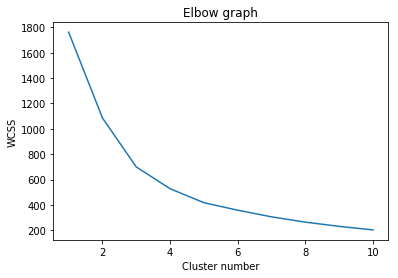

In [97]:
plt.plot(range(1,11), wcss)
plt.title('Elbow graph')
plt.xlabel('Cluster number')
plt.ylabel('WCSS')
plt.show()

In [98]:
# del analisis del grafico elegimos 4 clusters 
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
clusters = kmeans.fit_predict(rfmTableScores)

In [99]:
rfmTableScores1['clusters'] = clusters
rfmTableScores1.head()

C:\Users\ar035565\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,recency,frequency,monetary_value,clusters
customer,,,,
0,682,1,1317.00,1
1,1487,1,902.10,0
2,1781,3,2885.62,0
3,1737,1,2400.00,0
4,97,8,64999.00,3


Text(0.5,0,'Monetary')

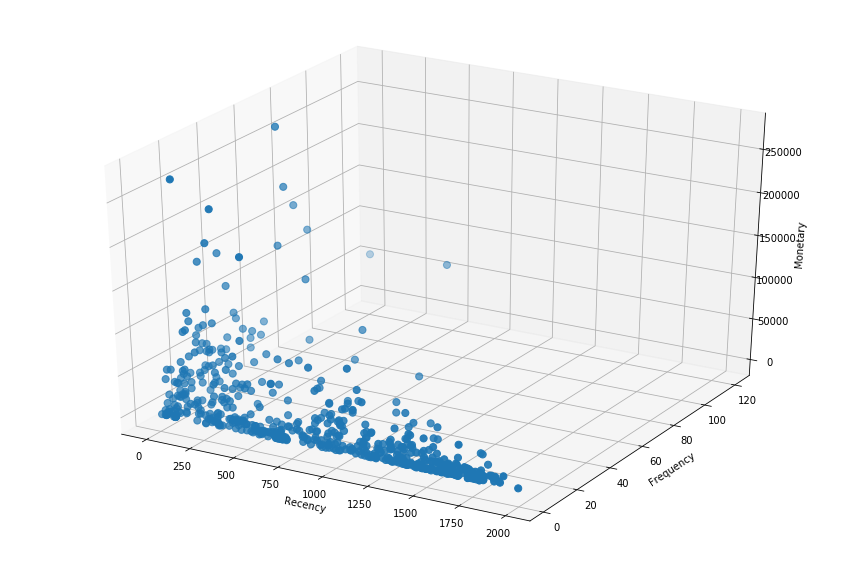

In [100]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(rfmTableScores1.recency, rfmTableScores1.frequency, rfmTableScores1.monetary_value, s=50)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

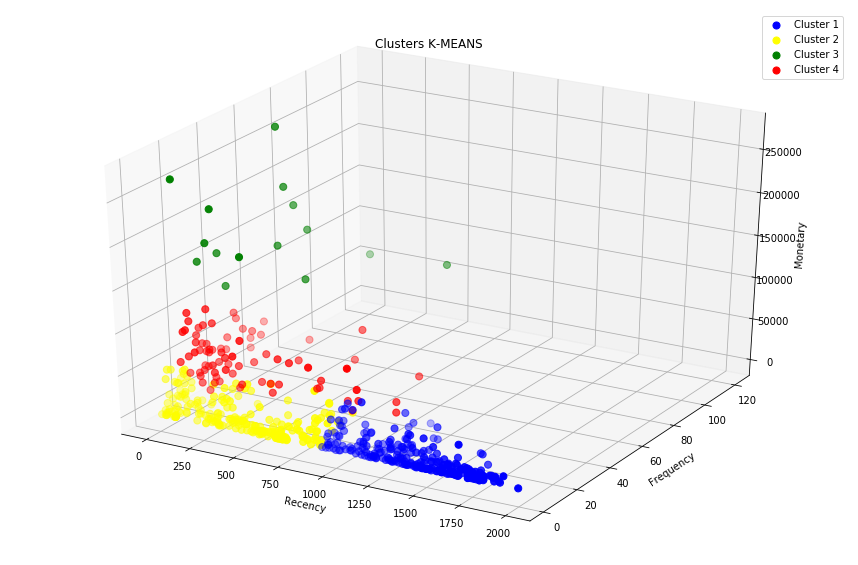

In [101]:
fig = plt.figure(figsize=(15,10))
dx = fig.add_subplot(111, projection='3d')
colors = ['blue', 'yellow', 'green', 'red']

for i in range(0,4):
    dx.scatter(rfmTableScores1[rfmTableScores1.clusters == i].recency, 
               rfmTableScores1[rfmTableScores1.clusters == i].frequency, 
               rfmTableScores1[rfmTableScores1.clusters == i].monetary_value, 
               c = colors[i], 
               label = 'Cluster ' + str(i+1), 
               s=50)

dx.set_title('Clusters K-MEANS')
dx.set_xlabel('Recency')
dx.set_ylabel('Frequency')
dx.set_zlabel('Monetary')
dx.legend()

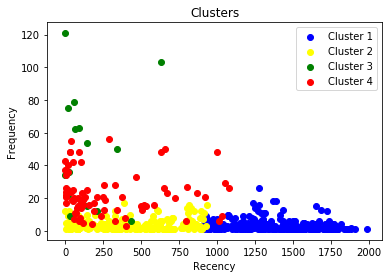

In [102]:
c1 = rfmTableScores1[rfmTableScores1.clusters == 0]
c2 = rfmTableScores1[rfmTableScores1.clusters == 1]
c3 = rfmTableScores1[rfmTableScores1.clusters == 2]
c4 = rfmTableScores1[rfmTableScores1.clusters == 3]

plt.scatter(c1.recency, c1.frequency, c = 'blue', label = 'Cluster 1')
plt.scatter(c2.recency, c2.frequency, c = 'yellow', label = 'Cluster 2')
plt.scatter(c3.recency, c3.frequency, c = 'green', label = 'Cluster 3')
plt.scatter(c4.recency, c4.frequency, c = 'red', label = 'Cluster 4')

plt.title('Clusters')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()

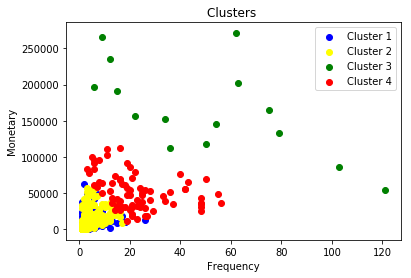

In [103]:
c1 = rfmTableScores1[rfmTableScores1.clusters == 0]
c2 = rfmTableScores1[rfmTableScores1.clusters == 1]
c3 = rfmTableScores1[rfmTableScores1.clusters == 2]
c4 = rfmTableScores1[rfmTableScores1.clusters == 3]

plt.scatter(c1.frequency, c1.monetary_value, c = 'blue', label = 'Cluster 1')
plt.scatter(c2.frequency, c2.monetary_value, c = 'yellow', label = 'Cluster 2')
plt.scatter(c3.frequency, c3.monetary_value, c = 'green', label = 'Cluster 3')
plt.scatter(c4.frequency, c4.monetary_value, c = 'red', label = 'Cluster 4')

plt.title('Clusters ')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.legend()

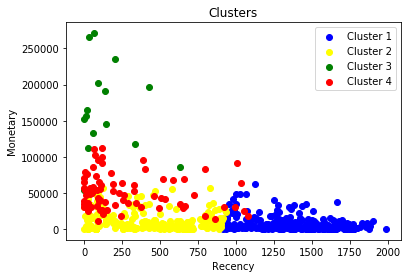

In [104]:
c1 = rfmTableScores1[rfmTableScores1.clusters == 0]
c2 = rfmTableScores1[rfmTableScores1.clusters == 1]
c3 = rfmTableScores1[rfmTableScores1.clusters == 2]
c4 = rfmTableScores1[rfmTableScores1.clusters == 3]

plt.scatter(c1.recency, c1.monetary_value, c = 'blue', label = 'Cluster 1')
plt.scatter(c2.recency, c2.monetary_value, c = 'yellow', label = 'Cluster 2')
plt.scatter(c3.recency, c3.monetary_value, c = 'green', label = 'Cluster 3')
plt.scatter(c4.recency, c4.monetary_value, c = 'red', label = 'Cluster 4')

plt.title('Clusters')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.legend()

##### Clustering Jerarquico 

In [105]:
df_cliente.head()

,antiguedad_empleo,cantidad_hijos,codigo_postal,edad,estado_civil,fecha_ingreso,localidad,mora_hoy,nacionalidad,seccion,sexo,telefono,tipo_propiedad
codigo_cliente,,,,,,,,,,,,,
0,34,0,1625,56,soltero_a,2017-01-02,1,0,argentina,domestico_a,f,1,alquilada
1,79,2,1625,49,viudo_a,2014-10-20,1,0,argentina,maestranza,f,1,alquilada
2,249,1,1625,53,casado_a,2013-10-04,3,1,argentina,no_disponible,f,1,alquilada
3,85,2,1631,38,casado_a,2014-02-12,8,0,argentina,no_disponible,m,1,alquilada
4,33,0,1625,41,casado_a,2016-08-12,58,0,argentina,operario_a,f,1,alquilada


In [106]:
df_cliente.drop(['fecha_ingreso'], axis=1, inplace= True)
df_cliente  = pd.get_dummies(df_cliente, columns = ['localidad'], prefix='locali', drop_first = True)
df_cliente  = pd.get_dummies(df_cliente, columns = ['estado_civil'], prefix='estado', drop_first = True)
df_cliente  = pd.get_dummies(df_cliente, columns = ['nacionalidad'], prefix='nac', drop_first = True)
df_cliente  = pd.get_dummies(df_cliente, columns = ['seccion'], prefix='secc', drop_first = True)
df_cliente  = pd.get_dummies(df_cliente, columns = ['sexo'], prefix='sex', drop_first = True)
df_cliente  = pd.get_dummies(df_cliente, columns = ['telefono'], prefix='tel', drop_first = True)
df_cliente  = pd.get_dummies(df_cliente, columns = ['tipo_propiedad'], prefix='prop', drop_first = True)

In [107]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
import os

In [108]:
X = df_cliente.iloc[:,:].values
Z = linkage(X, 'ward')
c, coph_dists = cophenet(Z, pdist(X))
c

0.9698001572127939

In [109]:
dist_c = cophenet(Z)
dist_c

array([  633.69264293,  2358.13006523,   633.69264293, ...,
       14346.97327485, 28261.81582092, 28261.81582092])

In [110]:
print(pdist(X).shape)
print(coph_dists.shape)

(171991,)
(171991,)


In [111]:
def eval_clusters_linkage(X, link_method):
    L = linkage(X, link_method)
    c, coph_dists = cophenet(L, pdist(X))
    print(link_method, c)
    plt.figure(figsize=[6,6])
    plt.title('Dendrogram - Method: ' + link_method.title())
    plt.xlabel('Index Numbers')
    plt.ylabel('Distance')
    dendrogram(L, leaf_rotation=90., leaf_font_size=5.)

ward 0.9698001572127939
single 0.9859597115332842
average 0.9946596125593752
complete 0.9902467134009507


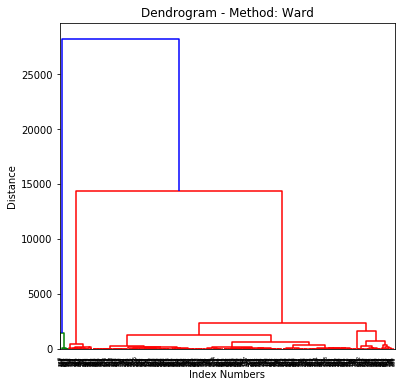

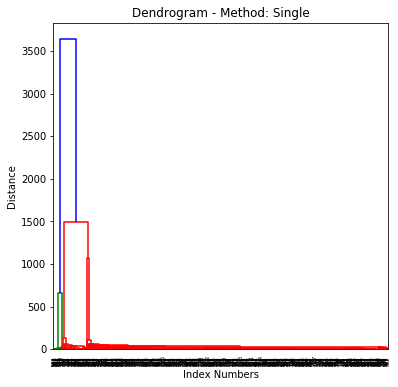

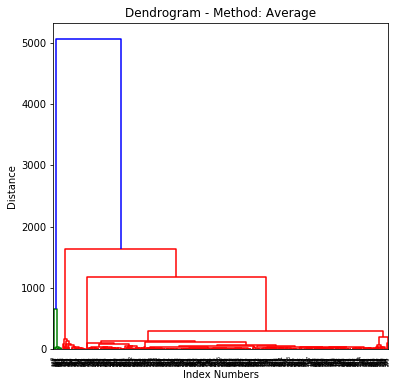

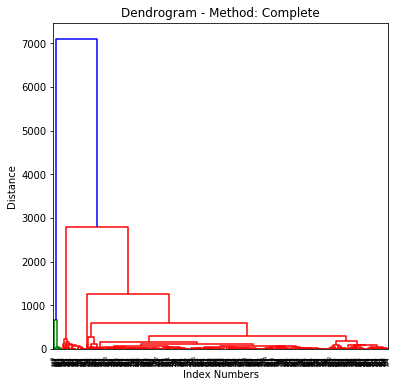

In [112]:
for i in ['ward','single','average','complete']:
    eval_clusters_linkage(X, i)

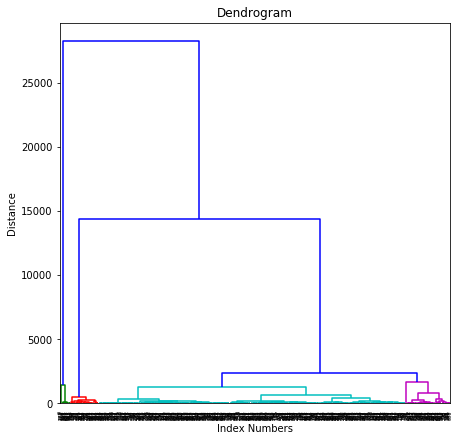

In [113]:
plt.figure(figsize=[7,7])
plt.title('Dendrogram')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  
    leaf_font_size=5.,
    color_threshold=2000,
)
plt.show()

In [114]:
max_dist = 2000
clusters = fcluster(Z, max_dist, criterion='distance')
#serie_cluster = pd.Series(clusters)
index = [str(i) for i in range(1, len(clusters)+1)]
df_clusters = pd.DataFrame(clusters,
                           index=index)
df_clusters.reset_index(inplace=True)

In [115]:
df_clusters.rename(columns={'index':'codigo_cliente',
                            0:'clusters'},inplace=True)
df_clusters.head()

,codigo_cliente,clusters
0,1,3
1,2,3
2,3,4
3,4,3
4,5,3


In [116]:
df_clusters.codigo_cliente.value_counts()

224    1
176    1
363    1
373    1
8      1
475    1
517    1
298    1
423    1
307    1
364    1
182    1
391    1
453    1
386    1
120    1
435    1
503    1
428    1
296    1
505    1
416    1
530    1
320    1
511    1
444    1
277    1
409    1
309    1
473    1
      ..
395    1
417    1
408    1
399    1
295    1
253    1
323    1
384    1
297    1
414    1
39     1
79     1
432    1
228    1
141    1
340    1
371    1
541    1
521    1
188    1
439    1
221    1
31     1
440    1
338    1
193    1
82     1
478    1
538    1
158    1
Name: codigo_cliente, Length: 587, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

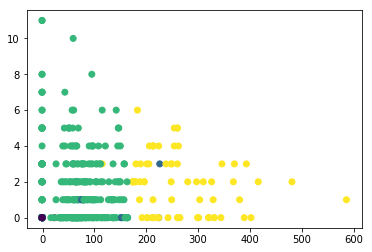

In [117]:
plt.scatter(X[:,0], X[:,1], c=clusters)
plt.show

In [118]:
#df_creditos = pd.concat([df_creditos, serie], axis=1)
df_creditos['codigo_cliente']=df_creditos['codigo_cliente'].apply(int)
df_clusters['codigo_cliente']=df_clusters['codigo_cliente'].apply(int)
df_creditos = pd.merge(df_creditos, df_clusters, how='left',on='codigo_cliente')

In [119]:
df_creditos.head()

,id_credito,fecha_ingreso,cantidad_cuotas,monto_credito,cuota,total_pagado,total_gastos,fecha_vencimiento_ultima_cuota,fecha_ultimo_pago,sucursal,...,saldo_credito_hoy,credito_no_vencido_hoy,mora_hoy,num_cred_cli,cred_no_ven_valor,cred_mora_valor,cred_cancel_valor,pagado_valor,gastos_valor,clusters
0,1981_2,2017-01-02,3,990.0,439.0,1317.00,0.00,2017-04-10,2017-03-07,1,...,0.00,0,0,1,0,0,0,0.00,0.00,NaN
1,888_2,2014-10-20,3,694.0,300.7,902.10,7.52,2015-01-10,2015-01-10,1,...,0.00,0,0,1,0,0,0,0.00,0.00,3.0
2,53_2,2013-10-04,8,1188.0,255.4,1381.62,320.53,2014-09-04,2014-09-04,1,...,406.18,0,1,1,0,0,0,0.00,0.00,3.0
3,57_2,2013-10-07,2,490.0,289.1,578.20,54.93,2013-12-10,2013-12-14,1,...,0.00,0,0,2,1,0,0,1381.62,320.53,3.0
4,205_2,2013-12-30,3,729.0,308.6,925.80,200.59,2014-04-10,2014-05-19,1,...,0.00,0,0,3,1,0,1,1959.82,375.46,3.0


In [134]:
#a los NaN le asignamos el valor del cluster mas grande (nro 3)
df_creditos.clusters.fillna(value=3,inplace=True)
df_creditos.clusters.isnull().sum()

0

#### Armamos un DataFrame de Features

In [135]:
# Primero incluimos la variable objetivo, las variables numéricas y las categóricas de
# solo 2 categorías
df_features = df_creditos[[
    'mora_hoy', 'cantidad_cuotas', 'monto_credito', 
    'cuota', 'telefono', 'edad', 'cantidad_hijos', 
    'antiguedad_empleo', 'credito_no_vencido_hoy', 'num_cred_cli', 'cred_no_ven_valor', 
    'cred_mora_valor', 'cred_cancel_valor', 'pagado_valor', 'gastos_valor','clusters'
                          ]]
                   

In [136]:
# Luego incluimos las variables categóricas con multiples categorías mediante dummies 
# con "one hot encoding" drop_first = True

L = ['codigo_comercio', 'localidad', 'codigo_postal', 'tipo_propiedad',  
     'nacionalidad', 'sexo', 'estado_civil', 'codigo_empresa', 'seccion',
     'rubro_comercio']

for i in L:
    dummies = pd.get_dummies(df_creditos[i], prefix=i, drop_first=True)
    df_features = df_features.join(dummies)

In [137]:
# Switch que permite hacer sensibilidad al modelo incluyendo o no las variables generadas
incluir_variables_generadas = 1
if incluir_variables_generadas != 1:
    df_features.drop('num_cred_cli', axis = 1, inplace = True)
    df_features.drop('cred_no_ven_valor', axis = 1, inplace = True)
    df_features.drop('cred_mora_valor', axis = 1, inplace = True)
    df_features.drop('cred_cancel_valor', axis = 1, inplace = True) 
    df_features.drop('pagado_valor', axis = 1, inplace = True)
    df_features.drop('gastos_valor', axis = 1, inplace = True)
    

In [138]:
df_features.shape

(4228, 471)

In [139]:
# Eliminamos las filas con Créditos no Vencidos ya que no sabemos si serán morosos 
mask_no_vencidos = df_features.loc[:,'credito_no_vencido_hoy'] == 1
df_features = df_features.loc[~mask_no_vencidos,:]

In [140]:
df_features.shape

(4088, 471)

In [141]:
# Eliminamos la columna que habíamos utilizado como indicador
df_features.drop('credito_no_vencido_hoy', axis = 1, inplace = True)

In [142]:
df_features.shape

(4088, 470)

In [143]:
df_features.columns

Index(['mora_hoy', 'cantidad_cuotas', 'monto_credito', 'cuota', 'telefono',
       'edad', 'cantidad_hijos', 'antiguedad_empleo', 'num_cred_cli',
       'cred_no_ven_valor',
       ...
       'seccion_ventas', 'rubro_comercio_blanqueria ',
       'rubro_comercio_calzado', 'rubro_comercio_calzados ',
       'rubro_comercio_construccion', 'rubro_comercio_indumentaria',
       'rubro_comercio_no_disponible', 'rubro_comercio_otro comercio',
       'rubro_comercio_regaleria', 'rubro_comercio_supermercado'],
      dtype='object', length=470)

#### Salvamos a disco los DataFrame para utilizar en otros "Notebook" 

In [144]:
df_cuotas.to_csv('df_cuotas_procesado.csv', sep = ';')
df_creditos.to_csv('df_creditos.csv', sep = ';')
df_features.to_csv('df_features.csv', sep = ';')